# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
DATA_PATH = Path('/content/drive/MyDrive/MERGE_Bimodal_Balanced')

Mounted at /content/drive


## Шляхи до файлів:

In [ ]:
METADATA_FILE = DATA_PATH / 'merge_bimodal_balanced_metadata.csv'
AV_VALUES_FILE = DATA_PATH / 'merge_bimodal_balanced_av_values.csv'

TRAIN_FILE = DATA_PATH / 'tvt_dataframes' / 'tvt_70_15_15' / 'tvt_70_15_15_train_bimodal_balanced.csv'
VAL_FILE = DATA_PATH / 'tvt_dataframes' / 'tvt_70_15_15' / 'tvt_70_15_15_validate_bimodal_balanced.csv'
TEST_FILE = DATA_PATH / 'tvt_dataframes' / 'tvt_70_15_15' / 'tvt_70_15_15_test_bimodal_balanced.csv'

## Завантаження даних:

In [ ]:
df_metadata = pd.read_csv(METADATA_FILE)
df_av_values = pd.read_csv(AV_VALUES_FILE)
df_train = pd.read_csv(TRAIN_FILE)
df_val = pd.read_csv(VAL_FILE)
df_test = pd.read_csv(TEST_FILE)

## Статистика:

In [ ]:

print(f"\nРозміри датафреймів:")
print(f"Metadata:        {df_metadata.shape[0]:,} записів, {df_metadata.shape[1]} колонок")
print(f"AV Values:       {df_av_values.shape[0]:,} записів, {df_av_values.shape[1]} колонок")
print(f"Training set:    {df_train.shape[0]:,} записів ({df_train.shape[0]/len(df_metadata)*100:.1f}%)")
print(f"Validation set:  {df_val.shape[0]:,} записів ({df_val.shape[0]/len(df_metadata)*100:.1f}%)")
print(f"Test set:        {df_test.shape[0]:,} записів ({df_test.shape[0]/len(df_metadata)*100:.1f}%)")

print(f"\nКолонки в Metadata:")
print(df_metadata.columns.tolist())

print(f"\nКолонки в AV Values:")
print(df_av_values.columns.tolist())

print("\nАНАЛІЗ ПРОПУЩЕНИХ ЗНАЧЕНЬ")


def analyze_missing(df, name):
    print(f"\n {name}:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Колонка': missing.index,
        'Пропущено': missing.values,
        'Відсоток': missing_pct.values
    })
    missing_df = missing_df[missing_df['Пропущено'] > 0].sort_values('Пропущено', ascending=False)

    if len(missing_df) > 0:
        display(missing_df)
    else:
        print("Немає пропущених значень!")

    return missing_df

missing_meta = analyze_missing(df_metadata, "Metadata")
missing_av = analyze_missing(df_av_values, "AV Values")


Розміри датафреймів:
  • Metadata:        2,000 записів, 27 колонок
  • AV Values:       2,000 записів, 4 колонок
  • Training set:    1,400 записів (70.0%)
  • Validation set:  300 записів (15.0%)
  • Test set:        300 записів (15.0%)

Колонки в Metadata:
['Audio_Song', 'Lyric_Song', 'Quadrant', 'AllMusic Id', 'AllMusic Extraction Date', 'Artist', 'Title', 'Relevance', 'Year', 'LowestYear', 'Duration', 'Moods', 'MoodsAll', 'MoodsAllWeights', 'Genres', 'GenreWeights', 'Themes', 'ThemeWeights', 'Styles', 'StyleWeights', 'AppearancesTrackIDs', 'AppearancesAlbumIDs', 'Sample', 'SampleURL', 'ActualYear', 'num_Genres', 'num_MoodsAll']

Колонки в AV Values:
['Audio_Song', 'Lyric_Song', 'Arousal', 'Valence']
vАНАЛІЗ ПРОПУЩЕНИХ ЗНАЧЕНЬ

 Metadata:


,Колонка,Пропущено,Відсоток
25,num_Genres,1990,99.50
26,num_MoodsAll,1990,99.50
9,LowestYear,690,34.50
17,ThemeWeights,236,11.80
16,Themes,236,11.80
8,Year,230,11.50
21,AppearancesAlbumIDs,220,11.00
20,AppearancesTrackIDs,220,11.00
23,SampleURL,144,7.20
18,Styles,143,7.15



 AV Values:
Немає пропущених значень!


### Аналіз емоцій (Arousal-Valence):


Статистика Valence (позитивність емоції):
count    2000.000000
mean        0.518494
std         0.229075
min         0.075000
25%         0.305000
50%         0.502500
75%         0.746250
max         0.956250
Name: Valence, dtype: float64

Статистика Arousal (інтенсивність емоції):
count    2000.000000
mean        0.474424
std         0.134831
min         0.062500
25%         0.360000
50%         0.498750
75%         0.576406
max         0.956250
Name: Arousal, dtype: float64


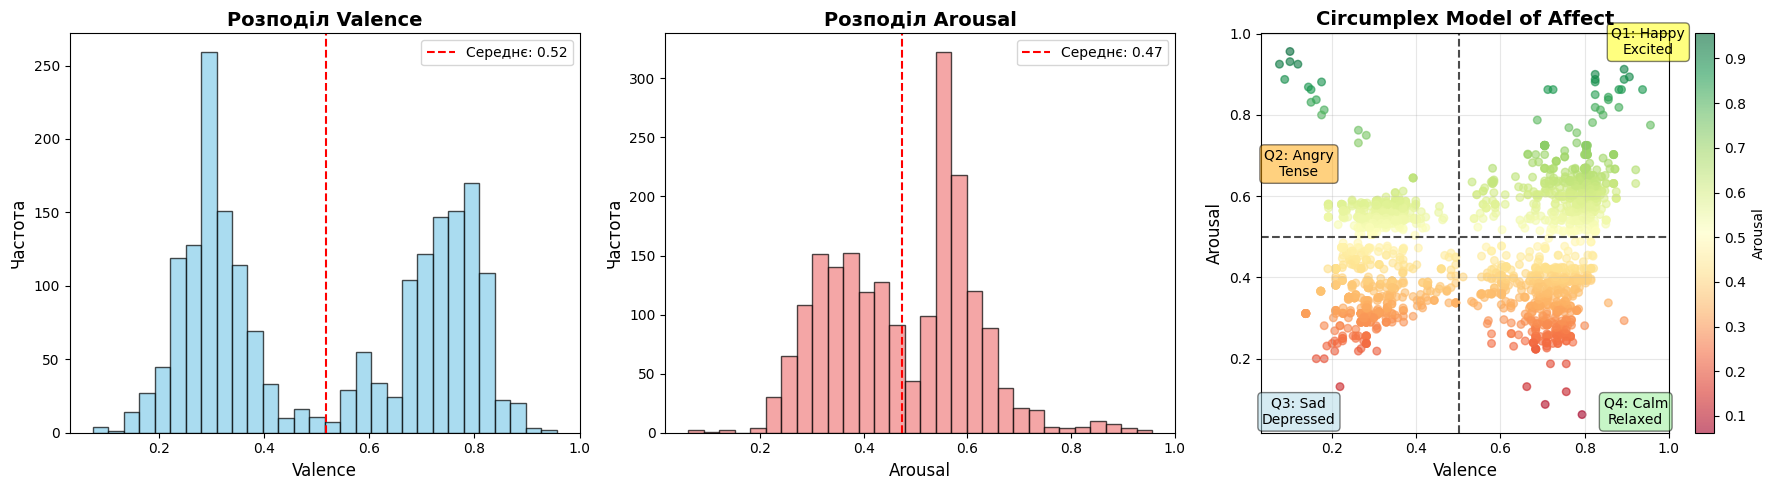


Кореляція між Valence та Arousal: 0.1527


In [ ]:
valence_col = 'Valence'
arousal_col = 'Arousal'

print("\nСтатистика Valence (позитивність емоції):")
print(df_av_values[valence_col].describe())

print("\nСтатистика Arousal (інтенсивність емоції):")
print(df_av_values[arousal_col].describe())
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df_av_values[valence_col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Valence', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].set_title('Розподіл Valence', fontsize=14, fontweight='bold')
axes[0].axvline(df_av_values[valence_col].mean(), color='red', linestyle='--',
                label=f'Середнє: {df_av_values[valence_col].mean():.2f}')
axes[0].legend()

axes[1].hist(df_av_values[arousal_col], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Arousal', fontsize=12)
axes[1].set_ylabel('Частота', fontsize=12)
axes[1].set_title('Розподіл Arousal', fontsize=14, fontweight='bold')
axes[1].axvline(df_av_values[arousal_col].mean(), color='red', linestyle='--',
                label=f'Середнє: {df_av_values[arousal_col].mean():.2f}')
axes[1].legend()

scatter = axes[2].scatter(df_av_values[valence_col], df_av_values[arousal_col],
                alpha=0.6, s=30, c=df_av_values[arousal_col], cmap='RdYlGn')

v_median = df_av_values[valence_col].median()
a_median = df_av_values[arousal_col].median()
axes[2].axhline(a_median, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
axes[2].axvline(v_median, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

axes[2].set_xlabel('Valence', fontsize=12)
axes[2].set_ylabel('Arousal', fontsize=12)
axes[2].set_title('Circumplex Model of Affect', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[2], label='Arousal')

x_pos_high = v_median + (1 - v_median) * 0.5
x_pos_low = v_median * 0.5
y_pos_high = a_median + (1 - a_median) * 0.5
y_pos_low = a_median * 0.5

axes[2].text(x_pos_high + 0.2, y_pos_high + 0.2, 'Q1: Happy\nExcited', ha='center', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
axes[2].text(x_pos_low - 0.13, y_pos_high - 0.1, 'Q2: Angry\nTense', ha='center', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))
axes[2].text(x_pos_low - 0.13, y_pos_low - 0.21, 'Q3: Sad\nDepressed', ha='center', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
axes[2].text(x_pos_high + 0.17, y_pos_low - 0.21, 'Q4: Calm\nRelaxed', ha='center', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

correlation = df_av_values[[valence_col, arousal_col]].corr().iloc[0, 1]
print(f"\nКореляція між Valence та Arousal: {correlation:.4f}")


# Розподіл емоцій за категоріями:


**Категорізація емоцій за Circumplex Model:**

    Q1 (V+, A+): Happy/Excited (високий valence, високий arousal)
    Q2 (V-, A+): Angry/Tense (низький valence, високий arousal)
    Q3 (V-, A-): Sad/Depressed (низький valence, низький arousal)
    Q4 (V+, A-): Calm/Relaxed (високий valence, низький arousal)


Медіанні значення:
   Valence median: 0.502
   Arousal median: 0.499

Розподіл пісень за емоційними квадрантами:
emotion_quadrant
Q4_Calm_Relaxed     500
Q3_Sad_Depressed    500
Q1_Happy_Excited    500
Q2_Angry_Tense      500
Name: count, dtype: int64

 У відсотках:
emotion_quadrant
Q4_Calm_Relaxed     25.0
Q3_Sad_Depressed    25.0
Q1_Happy_Excited    25.0
Q2_Angry_Tense      25.0
Name: count, dtype: float64


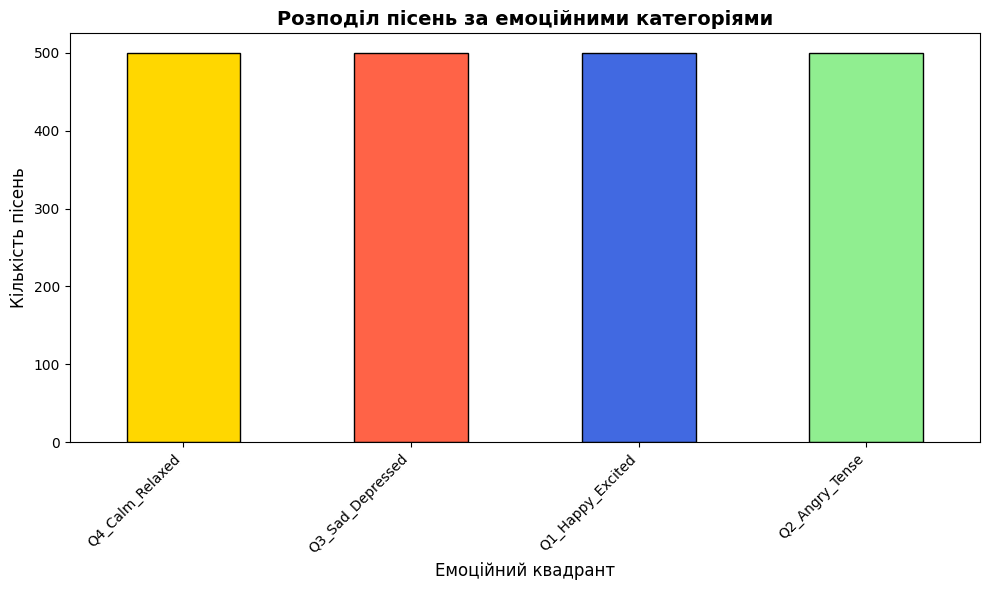

In [ ]:

valence_col = 'Valence'
arousal_col = 'Arousal'

valence_median = df_av_values[valence_col].median()
arousal_median = df_av_values[arousal_col].median()

print(f"\nМедіанні значення:")
print(f"   Valence median: {valence_median:.3f}")
print(f"   Arousal median: {arousal_median:.3f}")

def categorize_emotion(valence, arousal, v_threshold, a_threshold):
    if valence >= v_threshold and arousal >= a_threshold:
        return 'Q1_Happy_Excited'
    elif valence < v_threshold and arousal >= a_threshold:
        return 'Q2_Angry_Tense'
    elif valence < v_threshold and arousal < a_threshold:
        return 'Q3_Sad_Depressed'
    else:
        return 'Q4_Calm_Relaxed'

df_av_values['emotion_quadrant'] = df_av_values.apply(
    lambda row: categorize_emotion(row[valence_col], row[arousal_col],
                                   valence_median, arousal_median), axis=1
)

print("\nРозподіл пісень за емоційними квадрантами:")
emotion_dist = df_av_values['emotion_quadrant'].value_counts()
print(emotion_dist)
print(f"\n У відсотках:")
print((emotion_dist / len(df_av_values) * 100).round(2))

fig, ax = plt.subplots(figsize=(10, 6))
emotion_dist.plot(kind='bar', color=['#FFD700', '#FF6347', '#4169E1', '#90EE90'],
                  edgecolor='black', ax=ax)
ax.set_xlabel('Емоційний квадрант', fontsize=12)
ax.set_ylabel('Кількість пісень', fontsize=12)
ax.set_title('Розподіл пісень за емоційними категоріями', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Збереження даних:

In [ ]:

df_combined = df_metadata.merge(df_av_values, on=['Audio_Song', 'Lyric_Song'], how='left')
output_file = DATA_PATH / 'processed_data_with_emotions.csv'
df_combined.to_csv(output_file, index=False)
print(f"\n Збережено до: {output_file}")



 Об'єднаний датафрейм: (2000, 30)
   Колонки: ['Audio_Song', 'Lyric_Song', 'Quadrant', 'AllMusic Id', 'AllMusic Extraction Date', 'Artist', 'Title', 'Relevance', 'Year', 'LowestYear', 'Duration', 'Moods', 'MoodsAll', 'MoodsAllWeights', 'Genres', 'GenreWeights', 'Themes', 'ThemeWeights', 'Styles', 'StyleWeights', 'AppearancesTrackIDs', 'AppearancesAlbumIDs', 'Sample', 'SampleURL', 'ActualYear', 'num_Genres', 'num_MoodsAll', 'Arousal', 'Valence', 'emotion_quadrant']

 Збережено до: /content/drive/MyDrive/MERGE_Bimodal_Balanced/processed_data_with_emotions.csv
